In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
plt.style.use('fivethirtyeight')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [3]:
GRAPH = '../Results/Graphs'
TABLE = '..Results/Tables'
DATA = '../data'
VERSION = 11  #1: Merged All 2:Cleaned
# os.listdir(DATA)

In [153]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v'+str(VERSION) + '.csv'))
# ONET = pd.read_csv(os.path.join(DATA,'ONET_Occupations.csv'))
ONET = pd.read_csv(os.path.join(DATA,'Information_Technology.csv'))
skills = pd.read_csv(os.path.join(DATA,'skills.csv'))

In [192]:
START_YR = 2016
END_YR = 2019

In [193]:
skills_df = pd.read_csv('Skills_df.csv')
skills_df.drop(['Unnamed: 0'],axis=1,inplace=True)
# skills_df
skills_df['Name'] = df['Name']
SKILLS = skills_df.columns
skills_df = skills_df[skills_df['Year'].isin([START_YR,END_YR])].reset_index(drop=True)

In [194]:
temp = skills_df.groupby(['Name','Year']).sum()
index = temp.groupby('Name').size() > 1
temp = temp.reset_index()
temp.index = temp.Name
temp = temp[index]
temp =temp.set_index(['Name','Year'],drop=True)

<ipython-input-194-3f4980fdcdae>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp[index]


In [195]:
shift_df = pd.DataFrame(index=skills_df.columns,columns = skills_df.columns).fillna(0)
# shift_df

In [196]:
for company in temp.index.get_level_values(0):
    company_df = temp.loc[company]
    for skill1 in company_df.columns:
        if company_df.loc[START_YR,skill1] > 0:
            for skill2 in company_df.columns:
                if company_df.loc[END_YR,skill2] > 0:
                    shift_df.loc[skill1,skill2] += (0.8 * company_df.loc[END_YR,skill2] + 0.2 * company_df.loc[START_YR,skill1])

In [197]:
shift_df

,Database,Networking,Testing & QA,Java,PHP,JavaScript,API,SQL,jQuery,WordPress,...,Spring,Documentation,CCTV,C#,NodeJS,SQL Server,Design Pattern,Year,Title,Name
Database,633.2,618.4,499.2,152.4,204.0,322.8,360.0,254.4,214.4,50.4,...,50.8,456.8,83.6,182.4,5.2,203.2,166.8,0,0,0
Networking,688.0,948.8,606.8,180.4,267.6,411.6,406.0,329.6,287.6,57.2,...,49.6,543.2,193.2,206.0,10.0,259.6,188.0,0,0,0
Testing & QA,497.6,467.2,544.0,169.6,172.8,268.8,308.0,191.2,152.4,39.6,...,60.0,474.0,62.8,131.2,8.8,145.2,146.0,0,0,0
Java,194.4,230.0,273.2,136.0,106.0,172.4,197.6,98.4,104.0,15.6,...,50.8,211.2,24.4,44.8,3.6,58.4,76.8,0,0,0
PHP,286.4,303.2,246.0,68.0,292.0,302.8,272.0,90.0,202.8,80.0,...,28.4,193.2,52.8,41.6,8.4,50.8,77.2,0,0,0
JavaScript,374.4,369.2,287.2,142.4,246.8,371.6,285.6,172.8,227.6,70.8,...,43.6,246.8,38.0,93.2,12.8,113.2,92.0,0,0,0
API,310.8,310.4,306.8,74.8,150.8,208.8,261.2,117.2,134.8,37.2,...,34.4,229.2,24.8,102.0,2.4,82.8,109.6,0,0,0
SQL,254.4,282.4,248.4,66.8,99.6,182.8,164.0,181.6,136.4,22.0,...,22.8,204.0,26.4,95.2,0.0,128.8,50.4,0,0,0
jQuery,299.6,306.4,208.8,77.6,228.4,295.2,276.4,126.8,251.2,57.2,...,25.2,169.6,28.4,85.6,8.4,99.2,78.0,0,0,0
WordPress,107.6,96.8,98.8,28.4,127.6,129.6,151.6,36.8,89.6,69.6,...,8.4,84.0,25.6,9.6,2.8,17.6,33.6,0,0,0


In [198]:
import networkx as nx 
G = nx.DiGraph() 
for i in SKILLS: 
    for j in SKILLS: 
        if shift_df[i][j] >400: 
            G.add_edge(i,j,weight=shift_df[i][j]/100) 

In [199]:
widths = nx.get_edge_attributes(G, 'weight')
np.array(list(widths.values()),dtype=int)

array([6, 6, 4, 4, 4, 6, 9, 4, 5, 5, 4, 6, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4,
       4, 4])

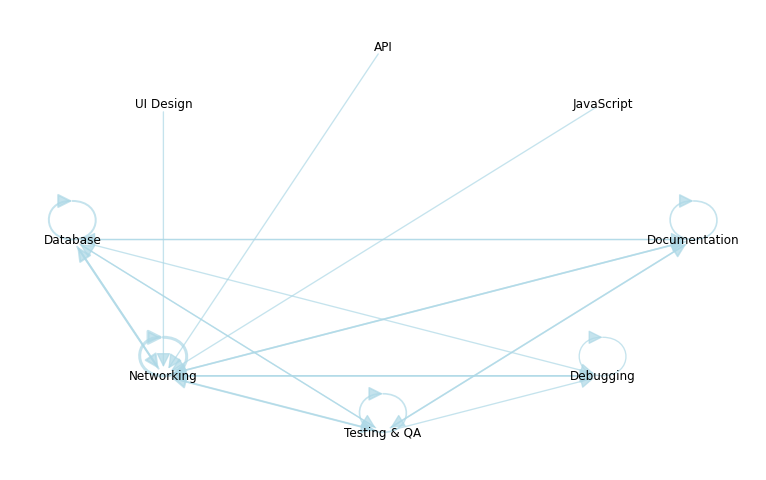

In [201]:

nodelist = G.nodes()

plt.figure(figsize=(12,8))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='lightblue',
                       alpha=0
                      )
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=np.array(list(widths.values()),dtype=int)/3,
                       edge_color='lightblue',
                       alpha=0.7,arrowsize=30)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.savefig('Shift16_19.png',dpi=350)
plt.show()
